In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
from torchvision.datasets import CIFAR10

from gp import oracle_gp
from convcnp import ConvCNP1d
from dataset import Synthetic1D
from kernels import eq_kernel, matern_kernel, periodic_kernel
from visualize import plot_all

import warnings
warnings.filterwarnings('ignore')

torch.manual_seed(1234)
np.random.seed(1234)

In [2]:
cnp = ConvCNP1d()
cnp.load_state_dict(torch.load('weights/cnp_matern.pth.gz', map_location=torch.device('cpu')))

<All keys matched successfully>

# No extrapolation

In [3]:
kernel = matern_kernel
dataset = Synthetic1D(kernel=kernel, train=False, num_total_max=10)

In [4]:
xc, yc, xt, yt = dataset[0]

In [5]:
with torch.no_grad():
    cnp_pred = cnp(xc.unsqueeze(0), yc.unsqueeze(0), xt.unsqueeze(0))
gp_pred = oracle_gp(xc.unsqueeze(0), yc.unsqueeze(0), xt.unsqueeze(0))

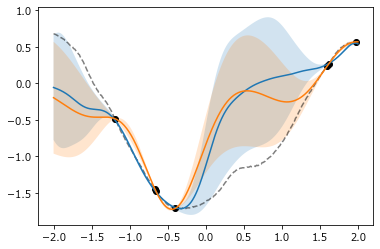

In [6]:
plt.plot(xc, yc, 'o', color='black')
plt.plot(xt, yt, '--', color='black', alpha=0.5)
plt.plot(xt, cnp_pred.mean.squeeze(0))
plt.fill_between(xt.squeeze(), cnp_pred.mean.squeeze() - cnp_pred.scale_tril.squeeze(), cnp_pred.mean.squeeze() + cnp_pred.scale_tril.squeeze(), alpha=0.2)
plt.plot(xt, gp_pred[0])
plt.fill_between(xt.squeeze(), gp_pred[0].flatten() - gp_pred[1].flatten(), gp_pred[0].flatten() + gp_pred[1].flatten(), alpha=0.2)

### Append Observation (= add context points)

In [7]:
xcc = torch.cat([xc, xt[250:251]], 0)
ycc = torch.cat([yc, yt[250:251]], 0)

with torch.no_grad():
    cnp_pred = cnp(xcc.unsqueeze(0), ycc.unsqueeze(0), xt.unsqueeze(0))
gp_pred = oracle_gp(xcc.unsqueeze(0), ycc.unsqueeze(0), xt.unsqueeze(0))

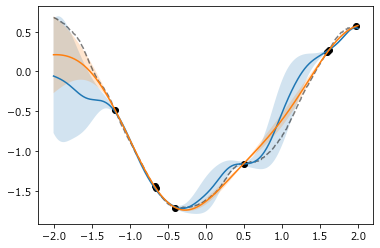

In [8]:
plt.plot(xcc, ycc, 'o', color='black')
plt.plot(xt, yt, '--', color='black', alpha=0.5)
plt.plot(xt, cnp_pred.mean.squeeze(0))
plt.fill_between(xt.squeeze(), cnp_pred.mean.squeeze() - cnp_pred.scale_tril.squeeze(), cnp_pred.mean.squeeze() + cnp_pred.scale_tril.squeeze(), alpha=0.2)
plt.plot(xt, gp_pred[0])
plt.fill_between(xt.squeeze(), gp_pred[0].flatten() - gp_pred[1].flatten(), gp_pred[0].flatten() + gp_pred[1].flatten(), alpha=0.2)

In [9]:
xcc = torch.cat([xc, xt[250:251], xt[310:311]], 0)
ycc = torch.cat([yc, yt[250:251], yt[310:311]], 0)

with torch.no_grad():
    cnp_pred = cnp(xcc.unsqueeze(0), ycc.unsqueeze(0), xt.unsqueeze(0))
gp_pred = oracle_gp(xcc.unsqueeze(0), ycc.unsqueeze(0), xt.unsqueeze(0))

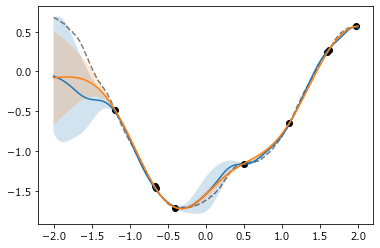

In [10]:
plt.plot(xcc, ycc, 'o', color='black')
plt.plot(xt, yt, '--', color='black', alpha=0.5)
plt.plot(xt, cnp_pred.mean.squeeze(0))
plt.fill_between(xt.squeeze(), cnp_pred.mean.squeeze() - cnp_pred.scale_tril.squeeze(), cnp_pred.mean.squeeze() + cnp_pred.scale_tril.squeeze(), alpha=0.2)
plt.plot(xt, gp_pred[0])
plt.fill_between(xt.squeeze(), gp_pred[0].flatten() - gp_pred[1].flatten(), gp_pred[0].flatten() + gp_pred[1].flatten(), alpha=0.2)

In [11]:
xcc = torch.cat([xc, xt[250:251], xt[310:311], xt[50:51]], 0)
ycc = torch.cat([yc, yt[250:251], yt[310:311], yt[50:51]], 0)

with torch.no_grad():
    cnp_pred = cnp(xcc.unsqueeze(0), ycc.unsqueeze(0), xt.unsqueeze(0))
gp_pred = oracle_gp(xcc.unsqueeze(0), ycc.unsqueeze(0), xt.unsqueeze(0))

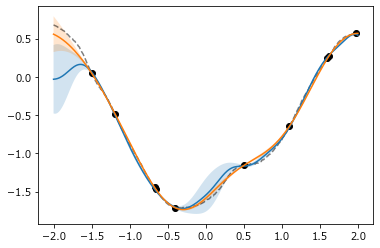

In [12]:
plt.plot(xcc, ycc, 'o', color='black')
plt.plot(xt, yt, '--', color='black', alpha=0.5)
plt.plot(xt, cnp_pred.mean.squeeze(0))
plt.fill_between(xt.squeeze(), cnp_pred.mean.squeeze() - cnp_pred.scale_tril.squeeze(), cnp_pred.mean.squeeze() + cnp_pred.scale_tril.squeeze(), alpha=0.2)
plt.plot(xt, gp_pred[0])
plt.fill_between(xt.squeeze(), gp_pred[0].flatten() - gp_pred[1].flatten(), gp_pred[0].flatten() + gp_pred[1].flatten(), alpha=0.2)

# Extrapolation

In [13]:
kernel = matern_kernel
dataset = Synthetic1D(kernel=kernel, train=False, data_range=(-8, 8))

In [14]:
_, _, xt, yt = dataset[0]
xc, yc = xt[[628, 770, 942]], yt[[628, 770, 942]] # sampled from [-2, 2] => index becomes [600, 1000]

In [15]:
with torch.no_grad():
    cnp_pred = cnp(xc.unsqueeze(0), yc.unsqueeze(0), xt.unsqueeze(0))
    gp_pred = oracle_gp(xc.unsqueeze(0), yc.unsqueeze(0), xt.unsqueeze(0))

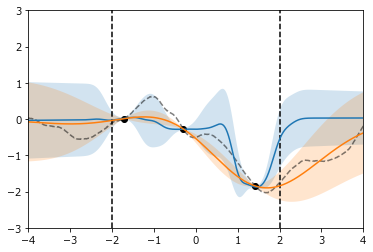

In [16]:
plt.plot(xc, yc, 'o', color='black')
plt.plot(xt, yt, '--', color='black', alpha=0.5)
plt.plot(xt, cnp_pred.mean.squeeze(0))
plt.fill_between(xt.squeeze(), cnp_pred.mean.squeeze() - cnp_pred.scale_tril.squeeze(), cnp_pred.mean.squeeze() + cnp_pred.scale_tril.squeeze(), alpha=0.2)
plt.plot(xt, gp_pred[0])
plt.fill_between(xt.squeeze(), gp_pred[0].flatten() - gp_pred[1].flatten(), gp_pred[0].flatten() + gp_pred[1].flatten(), alpha=0.2)
plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.vlines([-2, 2], -3, 3, linestyles='dashed')

## Add observation (interpolation)

In [17]:
xcc, ycc = xt[[630, 790, 942, 850]], yt[[630, 790, 942, 850]]

In [18]:
with torch.no_grad():
    cnp_pred = cnp(xcc.unsqueeze(0), ycc.unsqueeze(0), xt.unsqueeze(0))
    gp_pred = oracle_gp(xcc.unsqueeze(0), ycc.unsqueeze(0), xt.unsqueeze(0))

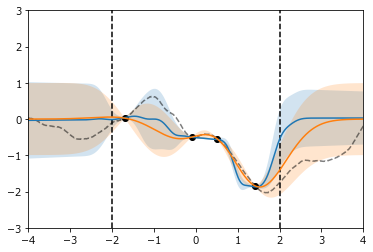

In [19]:
plt.plot(xcc, ycc, 'o', color='black')
plt.plot(xt, yt, '--', color='black', alpha=0.5)
plt.plot(xt, cnp_pred.mean.squeeze(0))
plt.fill_between(xt.squeeze(), cnp_pred.mean.squeeze() - cnp_pred.scale_tril.squeeze(), cnp_pred.mean.squeeze() + cnp_pred.scale_tril.squeeze(), alpha=0.2)
plt.plot(xt, gp_pred[0])
plt.fill_between(xt.squeeze(), gp_pred[0].flatten() - gp_pred[1].flatten(), gp_pred[0].flatten() + gp_pred[1].flatten(), alpha=0.2)
plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.vlines([-2, 2], -3, 3, linestyles='dashed')

In [20]:
xcc, ycc = xt[[630, 790, 942, 850, 680]], yt[[630, 790, 942, 850, 680]]

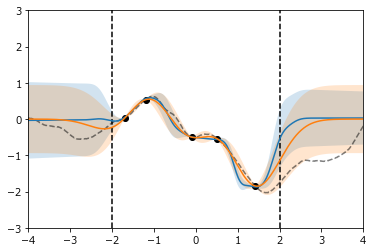

In [21]:
with torch.no_grad():
    cnp_pred = cnp(xcc.unsqueeze(0), ycc.unsqueeze(0), xt.unsqueeze(0))
    gp_pred = oracle_gp(xcc.unsqueeze(0), ycc.unsqueeze(0), xt.unsqueeze(0))
plt.plot(xcc, ycc, 'o', color='black')
plt.plot(xt, yt, '--', color='black', alpha=0.5)
plt.plot(xt, cnp_pred.mean.squeeze(0))
plt.fill_between(xt.squeeze(), cnp_pred.mean.squeeze() - cnp_pred.scale_tril.squeeze(), cnp_pred.mean.squeeze() + cnp_pred.scale_tril.squeeze(), alpha=0.2)
plt.plot(xt, gp_pred[0])
plt.fill_between(xt.squeeze(), gp_pred[0].flatten() - gp_pred[1].flatten(), gp_pred[0].flatten() + gp_pred[1].flatten(), alpha=0.2)
plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.vlines([-2, 2], -3, 3, linestyles='dashed')

## Add observation (extrapolation)

In [22]:
xcc, ycc = xt[[630, 790, 942, 850, 680, 461]], yt[[630, 790, 942, 850, 680, 461]]

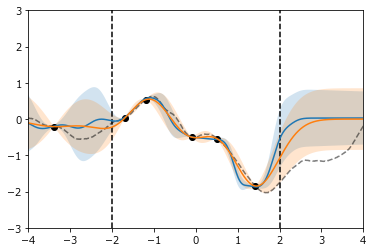

In [23]:
with torch.no_grad():
    cnp_pred = cnp(xcc.unsqueeze(0), ycc.unsqueeze(0), xt.unsqueeze(0))
    gp_pred = oracle_gp(xcc.unsqueeze(0), ycc.unsqueeze(0), xt.unsqueeze(0))
plt.plot(xcc, ycc, 'o', color='black')
plt.plot(xt, yt, '--', color='black', alpha=0.5)
plt.plot(xt, cnp_pred.mean.squeeze(0))
plt.fill_between(xt.squeeze(), cnp_pred.mean.squeeze() - cnp_pred.scale_tril.squeeze(), cnp_pred.mean.squeeze() + cnp_pred.scale_tril.squeeze(), alpha=0.2)
plt.plot(xt, gp_pred[0])
plt.fill_between(xt.squeeze(), gp_pred[0].flatten() - gp_pred[1].flatten(), gp_pred[0].flatten() + gp_pred[1].flatten(), alpha=0.2)
plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.vlines([-2, 2], -3, 3, linestyles='dashed')

In [24]:
xcc, ycc = xt[[630, 790, 942, 850, 680, 461, 1190]], yt[[630, 790, 942, 850, 680, 461, 1190]]

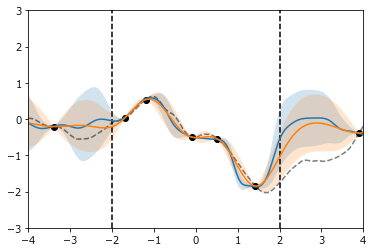

In [25]:
with torch.no_grad():
    cnp_pred = cnp(xcc.unsqueeze(0), ycc.unsqueeze(0), xt.unsqueeze(0))
    gp_pred = oracle_gp(xcc.unsqueeze(0), ycc.unsqueeze(0), xt.unsqueeze(0))
plt.plot(xcc, ycc, 'o', color='black')
plt.plot(xt, yt, '--', color='black', alpha=0.5)
plt.plot(xt, cnp_pred.mean.squeeze(0))
plt.fill_between(xt.squeeze(), cnp_pred.mean.squeeze() - cnp_pred.scale_tril.squeeze(), cnp_pred.mean.squeeze() + cnp_pred.scale_tril.squeeze(), alpha=0.2)
plt.plot(xt, gp_pred[0])
plt.fill_between(xt.squeeze(), gp_pred[0].flatten() - gp_pred[1].flatten(), gp_pred[0].flatten() + gp_pred[1].flatten(), alpha=0.2)
plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.vlines([-2, 2], -3, 3, linestyles='dashed')

In [26]:
xcc, ycc = xt[[630, 790, 942, 850, 680, 461, 1190, 1010]], yt[[630, 790, 942, 850, 680, 461, 1190, 1010]]

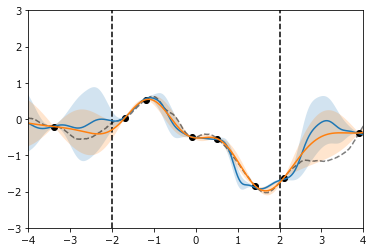

In [27]:
with torch.no_grad():
    cnp_pred = cnp(xcc.unsqueeze(0), ycc.unsqueeze(0), xt.unsqueeze(0))
    gp_pred = oracle_gp(xcc.unsqueeze(0), ycc.unsqueeze(0), xt.unsqueeze(0))
plt.plot(xcc, ycc, 'o', color='black')
plt.plot(xt, yt, '--', color='black', alpha=0.5)
plt.plot(xt, cnp_pred.mean.squeeze(0))
plt.fill_between(xt.squeeze(), cnp_pred.mean.squeeze() - cnp_pred.scale_tril.squeeze(), cnp_pred.mean.squeeze() + cnp_pred.scale_tril.squeeze(), alpha=0.2)
plt.plot(xt, gp_pred[0])
plt.fill_between(xt.squeeze(), gp_pred[0].flatten() - gp_pred[1].flatten(), gp_pred[0].flatten() + gp_pred[1].flatten(), alpha=0.2)
plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.vlines([-2, 2], -3, 3, linestyles='dashed')